<a href="https://colab.research.google.com/github/libanabduba/Deep-Learning-Lab-AAU/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forward and Backward propagation**
* Use 2 features in the input layer, 1 hidden layer with 4 neurons, and an output layer with 2 neurons.
* Use sigmoid activation in the hidden layer and linear activation in the output layer.
* Assume the task is regression task and use MSE for the loss function.


> ## The following is Image for the neural net we are going to build
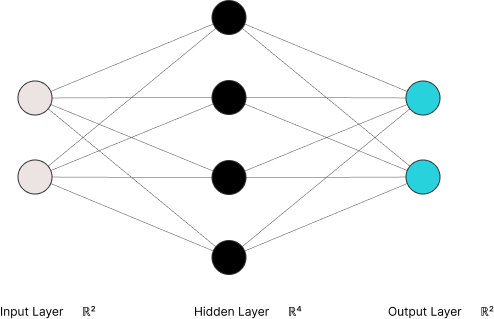

In [1]:
import torch

In [2]:
class DenseLayer:
  # Layer initialization
  def __init__(self, n_inputs, n_neurons):
    # Initialize weights and biases
    self.weights = 0.01 * torch.rand(n_inputs, n_neurons)
    self.biases = torch.zeros((1, n_neurons))

  # Forward pass
  def forward(self, inputs):
    # Calculate output values from inputs, weights and biases
    self.output = torch.matmul(inputs, self.weights) + self.biases

In [3]:
class Activation_Sigmoid:
  # Forward pass
  def forward(self, inputs):
    self.output = 1 / (1 + torch.exp(inputs*-1))
    return self.output

In [4]:
class LinearActivation:

    def forward(self, x):
        # Linear activation: f(x) = x
        self.output = x
        return self.output

In [5]:
def mse_loss(y_true, y_pred):
    return torch.mean(0.5*(y_true - y_pred) ** 2)

In [6]:
X = torch.rand((5, 2))
y = torch.rand(5,2)

(X, y)

(tensor([[0.0374, 0.7699],
         [0.2442, 0.1395],
         [0.9366, 0.8657],
         [0.9165, 0.4950],
         [0.4789, 0.4334]]),
 tensor([[0.5300, 0.3958],
         [0.6584, 0.7166],
         [0.7443, 0.8013],
         [0.3788, 0.6159],
         [0.9728, 0.9570]]))

In [7]:
hidden_layer_1 = DenseLayer(2, 4)
activation_1 =  Activation_Sigmoid()
output_layer = DenseLayer(4, 2)
activation_2 = LinearActivation()

In [8]:
def forward_pass(X):
  hidden_layer_1.forward(X)
  activation_1.forward(hidden_layer_1.output)
  output_layer.forward(activation_1.output)
  activation_2.forward(output_layer.output)
  return activation_2.output

In [9]:
def back_prop(fp):
    learning_rate = 0.01

    output_error = fp - y
    output_delta = output_error
    hidden_error = torch.matmul(output_delta, output_layer.weights.T)
    hidden_activation_derivative = activation_1.forward(hidden_layer_1.output) * (
        1 - activation_1.forward(hidden_layer_1.output)
    )
    hidden_delta = hidden_error * hidden_activation_derivative

    # Update output layer weights
    output_layer.weights -= learning_rate * torch.matmul(
        activation_1.output.T, output_delta
    )
    output_layer.biases -= learning_rate * torch.sum(output_delta, axis=0, keepdim=True)

    # Update hidden layer weights
    hidden_layer_1.weights -= learning_rate * torch.matmul(X.T, hidden_delta)
    hidden_layer_1.biases -= learning_rate * torch.sum(hidden_delta, axis=0, keepdim=True)

In [10]:
loss = 0.0001

In [12]:
y_pred = forward_pass(X)
err = mse_loss(y, y_pred)
print("Initial loss:", err.item())
print("Initial prediction:",y_pred)
while err > loss:
  back_prop(y_pred)
  y_pred = forward_pass(X)
  err = mse_loss(y, y_pred)
print("Final loss:", err)
print("Final prediction:",y_pred)
print("Target value:",y)

Initial loss: 9.998158930102363e-05
Initial prediction: tensor([[0.5294, 0.3981],
        [0.6772, 0.7247],
        [0.7535, 0.8158],
        [0.3794, 0.6139],
        [0.9449, 0.9346]])
Final loss: tensor(9.9982e-05)
Final prediction: tensor([[0.5294, 0.3981],
        [0.6772, 0.7247],
        [0.7535, 0.8158],
        [0.3794, 0.6139],
        [0.9449, 0.9346]])
Target value: tensor([[0.5300, 0.3958],
        [0.6584, 0.7166],
        [0.7443, 0.8013],
        [0.3788, 0.6159],
        [0.9728, 0.9570]])
